# Ví dụ 1

## 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = sns.load_dataset('iris')

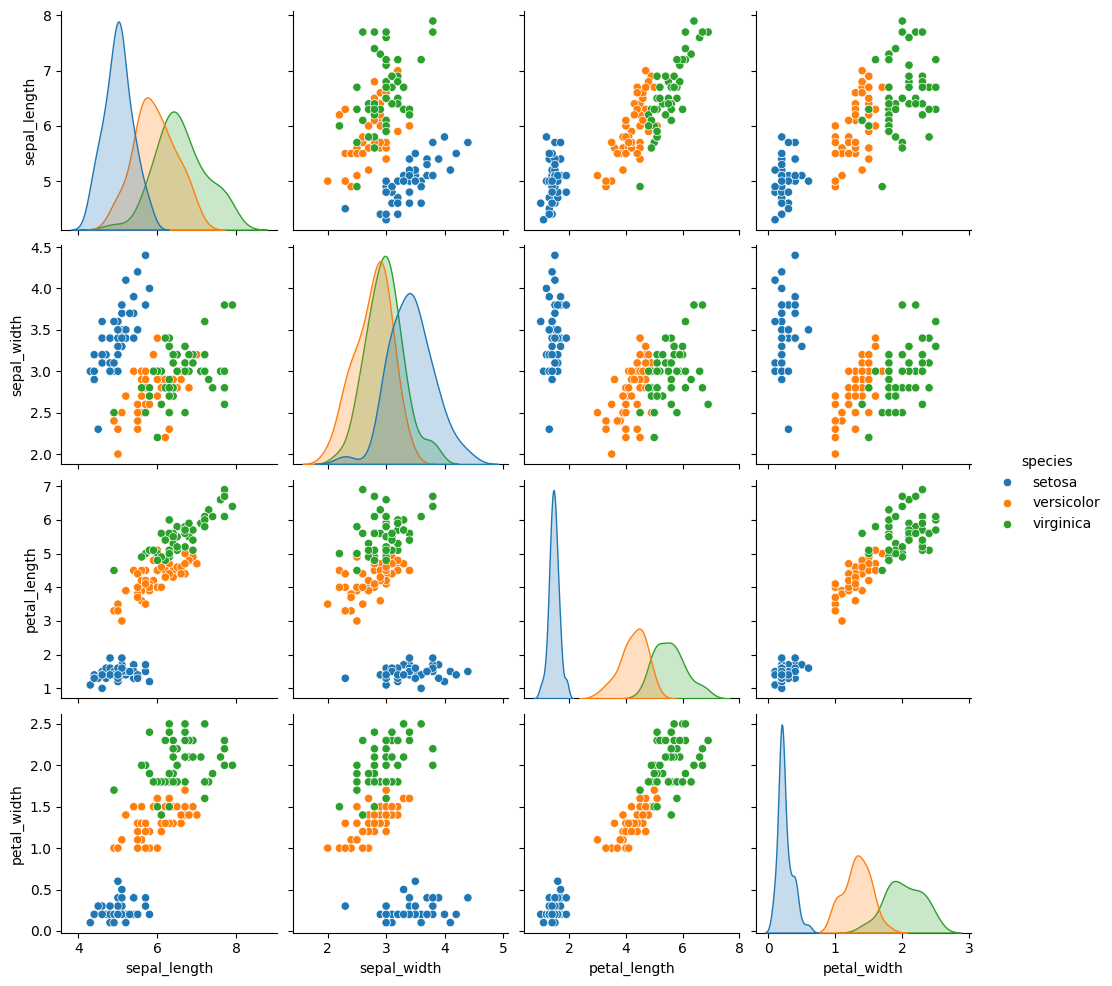

In [3]:
df.describe()
sns.pairplot(df, hue = 'species')

Text(0.5, 1.0, 'Correlation matrix')

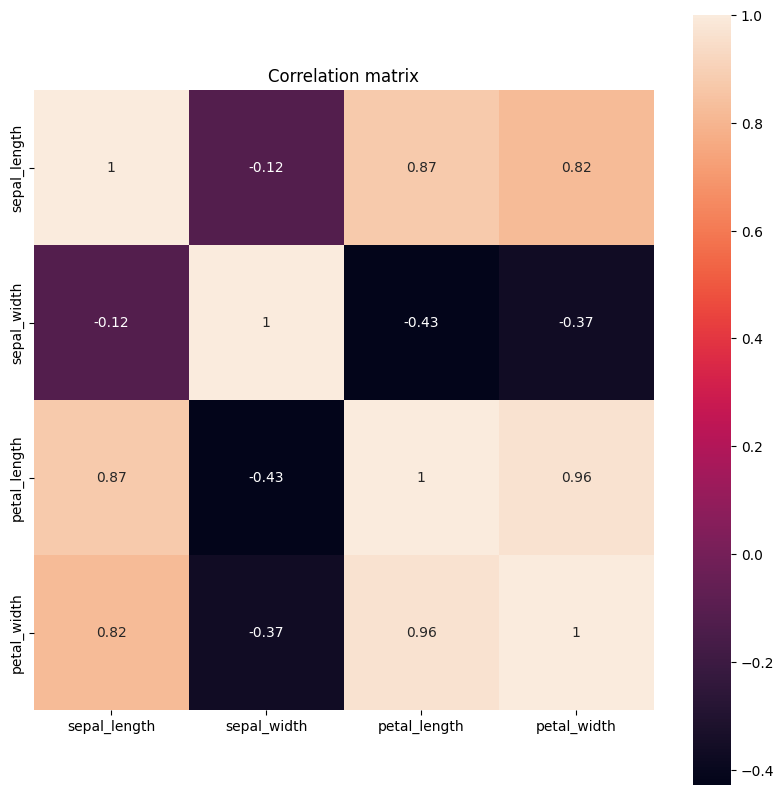

In [4]:
# We're seperating the species column
species = df["species"].tolist()
y = df['species']
X = df.drop("species", axis=1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [5]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), eigenvectors=array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

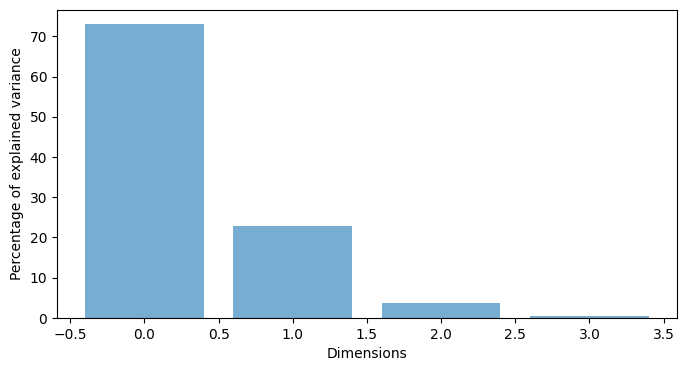

In [6]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [7]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

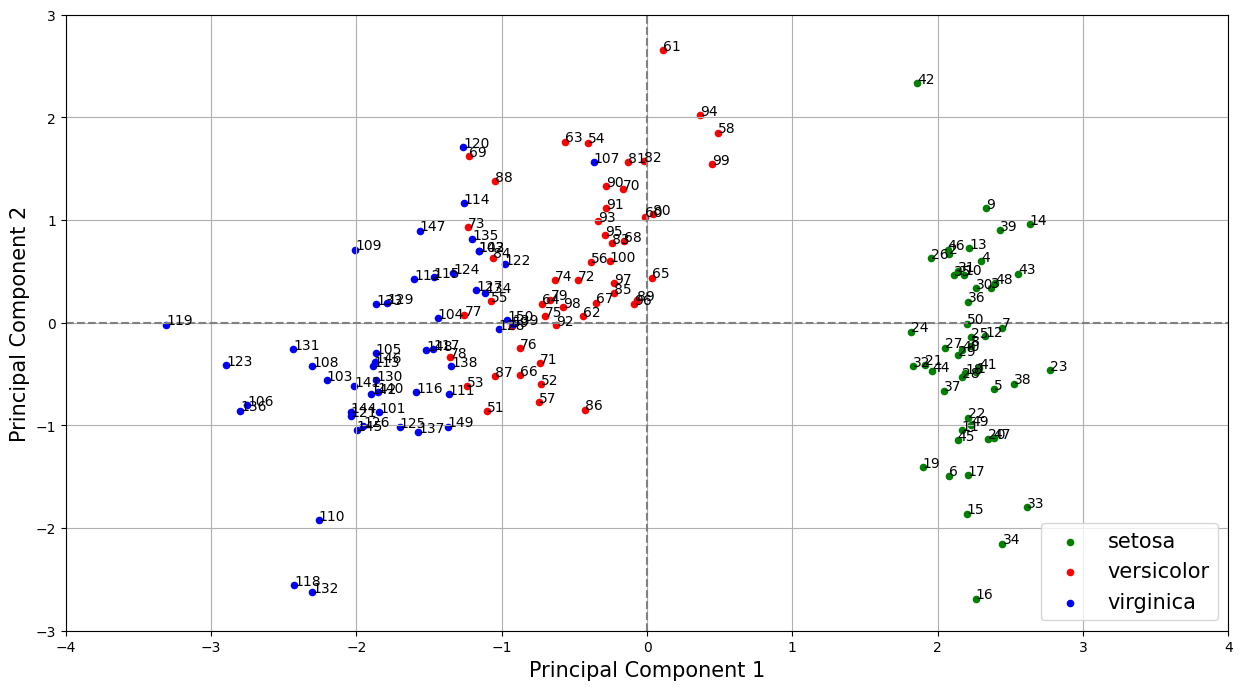

In [8]:
# plotting in 2D
import matplotlib.pyplot as plt
def plot_scatter(pc1, pc2):
  fig, ax = plt.subplots(figsize=(15, 8))
  species_unique = list(set(species))
  species_colors = ["r","b","g"]
  for i, spec in enumerate(species):
    plt.scatter(pc1[i], pc2[i], label = spec, s = 20,c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
  from collections import OrderedDict
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = OrderedDict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.axhline(y=0, color="grey", linestyle="--")
  ax.axvline(x=0, color="grey", linestyle="--")
  plt.grid()
  plt.axis([-4, 4, -3, 3])
  plt.show()
plot_scatter(pc1, pc2)

## 2.a)

In [9]:
y = df['species'].to_numpy()
X = df.drop("species", axis=1).to_numpy()

Chia dữ liệu

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

print(X_train.shape)  
print(y_train.shape)  

(120, 4)
(120,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## 2.b)

### i) Chia trước rồi mới giảm

In [12]:
print(X_train.shape)

(120, 4)


In [13]:
X_train = (X_train - X_train.mean()) / X_train.std(ddof=0)
X_test = (X_test - X_test.mean()) / X_train.std(ddof=0)
X_train_corr = (1/X_train.shape[0])*X_train.T.dot(X_train)
X_test_corr = (1/X_test.shape[0])*X_test.T.dot(X_test)

In [14]:
eig_vectors_train, eig_values_train,_ = np.linalg.svd(X_train_corr)
eig_vectors_test, eig_values_test,_ = np.linalg.svd(X_test_corr)

pc1_train = X_train.dot(eig_vectors_train[:, 0])
pc2_train = X_train.dot(eig_vectors_train[:, 1])

pc1_test = X_test.dot(eig_vectors_test[:, 0])
pc2_test = X_test.dot(eig_vectors_test[:, 1])
print(pc1_test.shape, pc2_test.shape)

(30,) (30,)


In [15]:
X_train_pca = np.column_stack((pc1_train, pc2_train))
X_test_pca = np.column_stack((pc1_test, pc2_test))

print(X_train_pca.shape, X_test_pca.shape)


(120, 2) (30, 2)


In [16]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f'Accuracy: {accuracy_score(y_test, y_pred_pca)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred_pca)}')

Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


ii) Giảm trước chia sau

In [17]:
X = (X - X.mean()) / X.std(ddof=0)
X_corr = (1 / 150) * X.T.dot(X)
eig_vecs, eig_vals,_ = np.linalg.svd(X_corr)


In [18]:
pc1_full = X.dot(eig_vecs[:, 0])
pc2_full = X.dot(eig_vecs[:, 1])


In [19]:
X_pca = np.column_stack((pc1_full, pc2_full))
print(X_pca.shape)

(150, 2)


In [20]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, stratify=y, random_state=42)

print(X_train_pca.shape)  
print(X_test_pca.shape)  


(120, 2)
(30, 2)


In [21]:
lr_pca_after = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred_pca = lr.predict(X_test_pca)
print(f'Accuracy: {accuracy_score(y_test, y_pred_pca)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_pred_pca)}')

Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# Ví dụ 2(Thực hành 1):

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("/home/vitquay1708/Study_Space/ml/week_6/data/pd_speech_features.csv")
df.head()
df['class'].value_counts()
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [24]:
y = df['class'].tolist()
X = df.drop('class', axis = 1)

X = (X - X.mean()) / X.std(ddof=0)
X_corr = (1 / 150) * X.T.dot(X)


## 1)

In [25]:
# plotting in 2D
import matplotlib.pyplot as plt
def plot_scatter(pc1, pc2):
  fig, ax = plt.subplots(figsize=(15, 8))
  species_unique = list(set(y))
  species_colors = ["r","b"]
  for i, spec in enumerate(y):
    plt.scatter(pc1[i], pc2[i], label = spec, s = 20,c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
  from collections import OrderedDict
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = OrderedDict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.axhline(y=0, color="grey", linestyle="--")
  ax.axvline(x=0, color="grey", linestyle="--")
  plt.grid()
  plt.axis([-4, 4, -3, 3])
  plt.show()

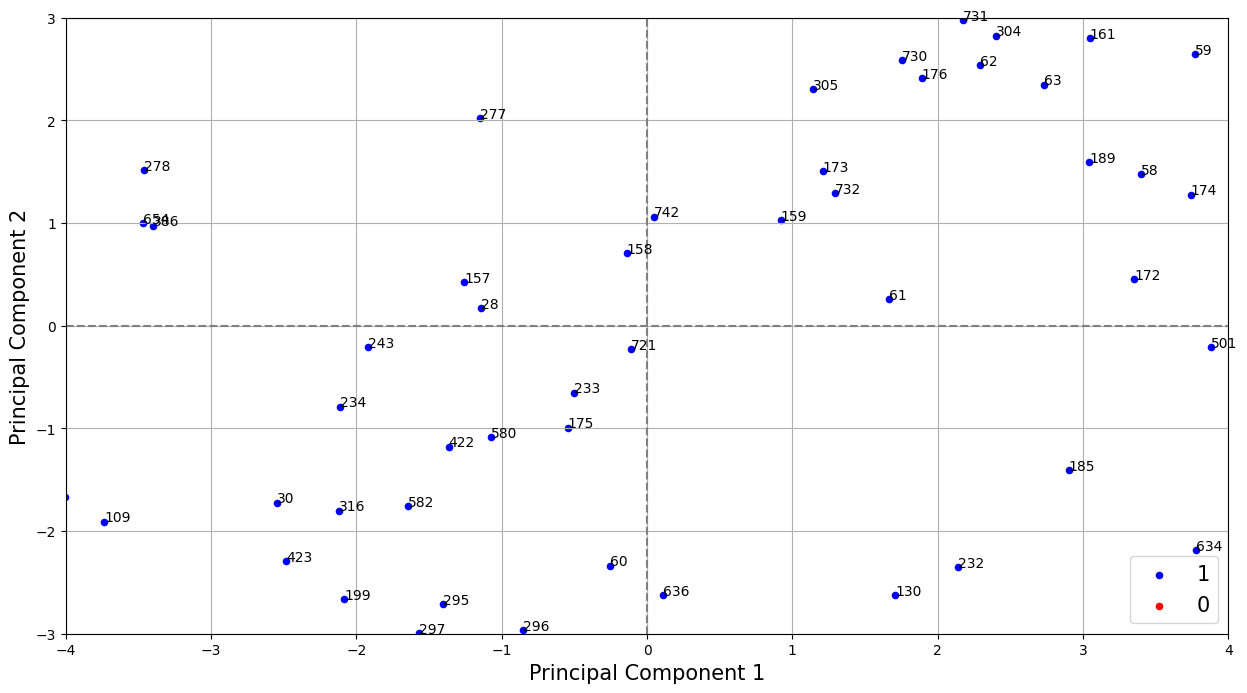

In [26]:
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s,u

pc1 = X.dot(eig_vectors[:, 0])
pc2 = X.dot(eig_vectors[:, 1])

plot_scatter(pc1, pc2)

## 2)

In [27]:
y = df['class'].tolist()
X = df.drop('class', axis = 1)
X = StandardScaler().fit_transform(X)

In [28]:
pca = PCA(n_components=200)
result = pca.fit_transform(X)
X_pca = result[:, :200]
print(X_pca.shape)

(756, 200)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=500, random_state=42)
print(X_train.shape)

(500, 200)


In [30]:
parkinson_lr = LogisticRegression()
parkinson_lr.fit(X_train, y_train)
y_pred = parkinson_lr.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')


accuracy_score:0.80078125
confusion_matrix:
 [[ 40  32]
 [ 19 165]]


## 3)

In [31]:
y = df['class'].tolist()
X = df.drop('class', axis = 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42)


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

lr_2 = LogisticRegression()
lr_2.fit(X = X_train, y= y_train)
y_pred = lr_2.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion matrix: \n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')

accuracy_score:0.79296875
confusion matrix: 
 [[ 38  34]
 [ 19 165]]


### Nhận xét:

Việc sử dụng phương pháp PCA trên toàn bộ tập X sẽ gây nên Rò rỉ dữ liệu.
Khi ta lấy ra n thành phần chính, nếu sử dụng PCA cho toàn bộ tập X, n thành phần chính này có sự ảnh hưởng của tập test, dấn đến các metrics sẽ không phản ánh chính xác mô hình có tốt hay không.

## 4)

In [34]:
y = df['class'].tolist()
X = df.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42)
print(X_train.shape)
print(X_test.shape)

(500, 754)
(256, 754)


In [35]:
pca_4 = PCA(n_components=0.8)
X_train = pca_4.fit_transform(X_train)
X_test = pca_4.transform(X_test)
print(X_train.shape)
print(X_test.shape)


(500, 1)
(256, 1)


In [36]:
lr_4 = LogisticRegression()
lr_4.fit(X_train, y_train)
y_pred = lr_4.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')


accuracy_score:0.61328125
confusion_matrix:
 [[ 43  29]
 [ 70 114]]


## 5)

In [37]:
from sklearn.naive_bayes import BernoulliNB
y = df['class'].tolist()
X = df.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [38]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')

accuracy_score:0.7828947368421053
confusion_matrix:
 [[  7  31]
 [  2 112]]


In [39]:
lr_5 = LogisticRegression()
lr_5.fit(X_train, y_train)
y_pred = lr_5.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')

accuracy_score:0.7302631578947368
confusion_matrix:
 [[  7  31]
 [ 10 104]]


Áp dụng phương pháp PCA

In [40]:
pca_5 = PCA(n_components=0.8)
X_train = pca_5.fit_transform(X_train)
X_test = pca_5.transform(X_test)


In [41]:
nb_pca = BernoulliNB()
nb_pca.fit(X_train, y_train)
y_pred = nb_pca.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')

accuracy_score:0.75
confusion_matrix:
 [[  0  38]
 [  0 114]]


In [42]:
lr_5_pca = LogisticRegression()
lr_5_pca.fit(X_train, y_train)
y_pred = lr_5_pca.predict(X_test)
print(f'accuracy_score:{accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(f'confusion_matrix:\n {confusion_matrix(y_pred=y_pred, y_true=y_test)}')

accuracy_score:0.6052631578947368
confusion_matrix:
 [[20 18]
 [42 72]]


# Ví dụ 3

In [43]:
with open('/home/vitquay1708/Study_Space/ml/week_3/data/vidu4_lin_reg.txt') as f:
  lines = f.readlines()

X = []
y = []

lines.pop(0)

for line in lines:
  splitted = line.replace('\n', '').split(' ')
  splitted.pop(0)
  splitted = list(map(float, splitted))
  y.append(splitted[5])
  X.append(splitted[:5])

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [44]:
scaler = StandardScaler()
new_X = scaler.fit_transform(X)

In [45]:
pca_vd3 = PCA(n_components=2)
new_X = pca_vd3.fit_transform(new_X)


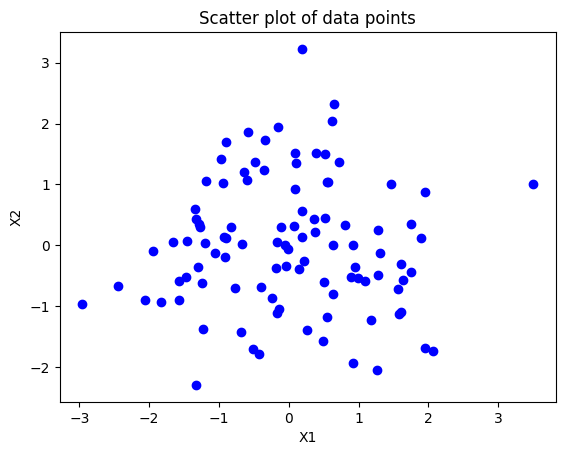

In [46]:
plt.scatter(new_X[:, 0], new_X[:, 1], color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data points')
plt.show()

In [47]:
print(X.shape)
print(y.shape)


(100, 5)
(100,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mean_y_pred = np.mean(y_pred)
var_y_pred = np.var(y_pred)
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
r_square = 1 - ((np.sum((y_test - y_pred) ** 2))/np.sum((y_test - mean_y_pred) ** 2))

print(f'Mean: {mean_y_pred}')
print(f'Variance: {var_y_pred}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')


Mean: 1.043579049300627
Variance: 0.02143574455650203
MSE: 0.17851473088966158
MAE: 0.242536801782411
R^2: 0.2761281025531631


PCA

In [50]:
pca_vd3 = PCA(n_components=2)
X_train = pca_vd3.fit_transform(X_train)
X_test = pca_vd3.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [51]:
linear_pca = LinearRegression()
linear_pca.fit(X_train, y_train)
y_pred = linear_pca.predict(X_test)
mean_y_pred = np.mean(y_pred)
var_y_pred = np.var(y_pred)
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
r_square = 1 - ((np.sum((y_test - y_pred) ** 2))/np.sum((y_test - mean_y_pred) ** 2))

print(f'Mean: {mean_y_pred}')
print(f'Variance: {var_y_pred}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r_square}')

Mean: 1.0462724640555403
Variance: 0.023564918218299598
MSE: 0.18412320315958705
MAE: 0.25228151444573166
R^2: 0.25146350496417136


## Nhận xét

Các sai số MSE, MAE đều có sự tăng nhẹ, bên cạnh đó R-square giảm nhẹ cho thấy PCA làm một phần thông tin quan trọng cho dự đoán có thể bị loại bỏ. PCA chỉ giữ các thành phần chính có phương sai lớn nhất, không đảm bảo rằng những thành phần đó có tương quan cao nhất với biến đầu ra. Hay nói cách khác, PCA chỉ tối ưu theo phương sai của X, không theo hiệu quả dự đoán của Y

# Ví dụ 4

In [52]:
import os
import numpy as np
import pandas as pd
# set names to the paths because they're too long
data_path = '/home/vitquay1708/Study_Space/ml/week_5/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [53]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):

# read data
  import gzip # to decompress gz (zip) file
  # open file training to read training data
  f_images = gzip.open(images_path,'r')
  # skip 16 first bytes because these are not data, only header infor
  f_images.read(16)
  # general: read num_images data samples if this parameter is set;
  # if not, read all (60000 training or 10000 test)

  real_num = num_images if not shuffle else (60000 if _is else 10000)
  # read all data to buf_images (28x28xreal_num)
  buf_images = f_images.read(image_size * image_size * real_num)
  # images
  images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
  images = images.reshape(real_num, image_size, image_size,)
  # Read labels
  f_labels = gzip.open(labels_path,'r')
  f_labels.read(8)
  labels = np.zeros((real_num)).astype(np.int64)
  # rearrange to correspond the images and labels
  for i in range(0, real_num):
    buf_labels = f_labels.read(1)
    labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
  # shuffle to get random images data
  if shuffle is True:
    rand_id = np.random.randint(real_num, size=num_images)
    images = images[rand_id, :]
    labels = labels[rand_id,]
  # change images data to type of vector 28x28 dimentional
  images = images.reshape(num_images, image_size * image_size)
  return images, labels

In [54]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [55]:
pca_vd4 = PCA(n_components=100)
train_images_pca = pca_vd4.fit_transform(train_images)
print(train_images_pca.shape)

(5000, 100)


## b)

In [56]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, train_size=0.7, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3500, 784)
(1500, 784)


In [58]:
lr_vd4 = LogisticRegression(multi_class='multinomial')
lr_vd4.fit(X_train, y_train)
pred_labels = lr_vd4.predict(X_test)
print(f'accuracy_score: {accuracy_score(y_test, pred_labels)}')
print(f'confusion matrix: \n {confusion_matrix(y_test, pred_labels)}')

accuracy_score: 0.8746666666666667
confusion matrix: 
 [[134   0   2   0   0   3   0   0   0   0]
 [  0 158   2   3   0   0   0   1   2   0]
 [  3   3 139   2   1   2   7   2   7   0]
 [  0   2   3 127   1  19   0   1   9   2]
 [  0   0   2   0 127   1   0   0   1  10]
 [  2   2   3   3   5  98   4   0   4   3]
 [  0   0   1   0   1   5 122   0   2   2]
 [  2   0   3   0   4   0   0 147   3   4]
 [  0   6   7   5   0   4   1   0 132   3]
 [  1   1   2   2   3   3   0   3   3 128]]


## PCA trước chia sau

In [59]:
pca_vd4 = PCA(n_components=100)
train_images_pca = pca_vd4.fit_transform(train_images)
print(train_images_pca.shape)

(5000, 100)


In [60]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(train_images_pca, train_labels, train_size=0.7, random_state=42)
print(X_train_pca.shape)
print(X_test_pca.shape)

(3500, 100)
(1500, 100)


In [61]:
lr_vd4_pca = LogisticRegression(multi_class='multinomial')
lr_vd4_pca.fit(X_train_pca, y_train)
pred_labels = lr_vd4_pca.predict(X_test_pca)
print(f'accuracy_score: {accuracy_score(y_test, pred_labels)}')
print(f'confusion matrix: \n {confusion_matrix(y_test, pred_labels)}')

accuracy_score: 0.8393333333333334
confusion matrix: 
 [[131   0   2   0   0   5   1   0   0   0]
 [  0 153   3   3   0   2   0   1   2   2]
 [  3   3 131   4   0   3   7   5   9   1]
 [  0   3   5 123   1  15   5   2   8   2]
 [  0   0   0   0 127   0   4   0   2   8]
 [  3   3   2   4   5  93   6   1   6   1]
 [  3   1   2   1   2   8 113   1   1   1]
 [  1   1   1   2   4   0   1 146   1   6]
 [  3   5   6   6   2  11   4   2 117   2]
 [  1   0   2   3   7   1   0   4   3 125]]


## Chia trước PCA sau

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, train_size=0.7, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3500, 784)
(1500, 784)


In [63]:
pca_after = PCA(n_components=100)
X_train_pca = pca_after.fit_transform(X_train)
X_test_pca = pca_after.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(3500, 100)
(1500, 100)


In [64]:
lr_vd4_pca_after = LogisticRegression(multi_class='multinomial')
lr_vd4_pca_after.fit(X_train_pca, y_train)
y_pred_pca_after = lr_vd4_pca_after.predict(X_test_pca)
print(f'accuracy_score: {accuracy_score(y_test, y_pred_pca_after)}')
print(f'confusion matrix: \n {confusion_matrix(y_test, y_pred_pca_after)}')

accuracy_score: 0.8413333333333334
confusion matrix: 
 [[130   0   3   0   0   4   2   0   0   0]
 [  0 154   4   2   0   2   0   1   2   1]
 [  4   2 131   4   0   3   9   4   8   1]
 [  1   4   7 120   0  12   6   1  11   2]
 [  0   0   1   0 124   0   4   0   2  10]
 [  4   4   2   6   4  92   5   0   6   1]
 [  3   0   1   0   4   6 116   1   1   1]
 [  1   1   1   1   3   0   2 143   2   9]
 [  4   3   6   7   2   4   3   1 125   3]
 [  1   0   2   3   6   1   1   3   2 127]]


# Ví dụ 5

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = '/home/vitquay1708/Study_Space/ml/week_6/data/archive/'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses','normal', 'rightlight','sad', 'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
print(path+fn)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X = np.zeros((D, N))
y = np.zeros(N, dtype=int)
# collect all data
count = 0
# there are 15 people
for person_id in range(1, 16):
  for state in states:
  # get name of each image file
    fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
    # open the file and read as grey image
    tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    # then add image to dataset X
    X[:, count] = tmp.reshape(D)
    y[count] = person_id
    count += 1
X = X.T
print(X.shape)
print(y)

/home/vitquay1708/Study_Space/ml/week_6/data/archive/subject01.centerlight
165 77760 243 320
(165, 77760)
[ 1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 11 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 14
 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15]


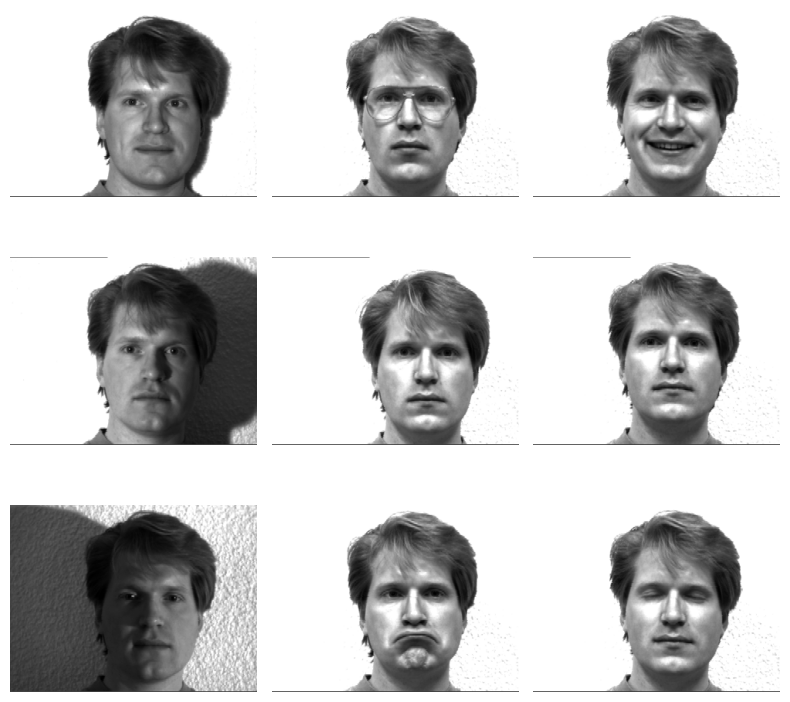

In [66]:
plt.figure(figsize=(8, 8))

for i in range(9):
  img_vec = X[i, :]
  img = img_vec.reshape((h, w))
  plt.subplot(3, 3, i + 1)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')

plt.tight_layout()
plt.show()

## PCA

In [67]:
pca_vd5 = PCA(n_components=135)
X = pca_vd5.fit_transform(X)
min_val = X.min()
if min_val < 0:
  X = X + abs(min_val)

print(X.shape)
print(np.sum(X<0))

(165, 135)
0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

## Logistic Regression

In [69]:
lr_vd5 = LogisticRegression(multi_class='multinomial', max_iter = 1000, penalty='l2')
lr_vd5.fit(X_train, y_train)
y_pred = lr_vd5.predict(X_test)
print(f'accuracy_score: {accuracy_score(y_test, y_test)}')
print(f'confusion matrix: \n {confusion_matrix(y_test, y_test)}')

accuracy_score: 1.0
confusion matrix: 
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


## Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
nb_vd5 = MultinomialNB()
nb_vd5.fit(X_train, y_train)
y_pred = nb_vd5.predict(X_test)
print(f'accuracy_score: {accuracy_score(y_test, y_test)}')
print(f'confusion matrix: \n {confusion_matrix(y_test, y_test)}')

accuracy_score: 1.0
confusion matrix: 
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


In [72]:
path = '/home/vitquay1708/Study_Space/ml/week_6/data/'
test_files = []
for file in os.listdir(path):
  if file.endswith('.jpg'):
    test_files.append(os.path.join(path, file))
print(len(test_files))

5


In [73]:
test_imgs = []
shift_x = 54
H, W = 320, 243
M = np.float32([[1, 0, shift_x],
                [0, 1, 0]])
for fn in test_files:
  img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
  img_resized = cv2.resize(img, (W, H))
  center = (W//2, H//2)
  angle = -30
  scale = 1.0
  m_rotate = cv2.getRotationMatrix2D(center, angle, scale)
  rotated = cv2.warpAffine(img_resized, m_rotate, (W, H))

  shift_x = 40
  m_shift = np.float32([[1, 9, shift_x], [0, 1, 0]])
  shifted_img = cv2.warpAffine(img_resized, M, (W, H), borderValue=0)
  test_imgs.append(img_resized)

In [74]:
test_data = np.zeros((5, W*H))
i = 0
print(test_data.shape)
for img in test_imgs:
  Xi = np.array(img).reshape(1, H*W)
  test_data[i] = Xi
  i+=1

print(test_data.shape)


(5, 77760)
(5, 77760)


In [75]:
test_data = pca_vd5.transform(test_data)
print(test_data.shape)

(5, 135)


## Logistic Regression

In [76]:
y_pred = lr_vd5.predict(test_data)
print(y_pred)

[6 6 6 6 6]


## Naive Bayes

In [77]:
y_pred = nb_vd5.predict(test_data)
print(y_pred)

[6 6 6 6 6]
